# Regridding ROMS Output

In [1]:
from roms_tools import Grid, ROMSOutput

We first read some ROMS data. For more details on reading ROMS data, see [this notebook](https://roms-tools.readthedocs.io/en/latest/reading_roms_output.html).

In [2]:
grid = Grid.from_file(
    "/global/cfs/projectdirs/m4746/Datasets/ROMSOutput/epac25km_grd.nc"
)

WARNING - Vertical coordinates (Cs_r, Cs_w) not found in grid file.
INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
INFO - Total time: 0.003 seconds
INFO - ========================================================================================================


In [3]:
roms_output = ROMSOutput(
    grid=grid,
    path=[
        "/global/cfs/projectdirs/m4746/Datasets/ROMSOutput/eastpac25km_rst.19980106000000.nc",
        "/global/cfs/projectdirs/m4746/Datasets/ROMSOutput/eastpac25km_rst.19990201000000.nc",
    ],
    use_dask=True,
)

/global/cfs/cdirs/m4746/Users/nora/roms-tools/roms_tools/utils.py:146: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  ds = xr.open_mfdataset(


In [4]:
roms_output.ds

<xarray.Dataset> Size: 3GB
Dimensions:                (time: 4, auxil: 6, eta_rho: 162, xi_rho: 122,
                            xi_u: 121, eta_v: 161, s_rho: 100)
Coordinates:
    abs_time               (time) datetime64[ns] 32B 1998-01-05T23:50:00 ... ...
    lon_rho                (eta_rho, xi_rho) float64 158kB ...
    lat_rho                (eta_rho, xi_rho) float64 158kB ...
    lat_u                  (eta_rho, xi_u) float64 157kB 7.72 7.831 ... 52.23
    lon_u                  (eta_rho, xi_u) float64 157kB 231.9 232.1 ... 237.4
    lat_v                  (eta_v, xi_rho) float64 157kB 7.758 7.87 ... 52.18
    lon_v                  (eta_v, xi_rho) float64 157kB 231.8 232.0 ... 237.6
Dimensions without coordinates: time, auxil, eta_rho, xi_rho, xi_u, eta_v, s_rho
Data variables: (12/55)
    ocean_time             (time) float64 32B dask.array<chunksize=(1,), meta=np.ndarray>
    time_step              (time, auxil) int32 96B dask.array<chunksize=(1, 6), meta=np.ndarray>
    zeta                   (time, eta_rho, xi_rho) float64 632kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    ubar                   (time, eta_rho, xi_u) float64 627kB dask.array<chunksize=(1, 162, 121), meta=np.ndarray>
    vbar                   (time, eta_v, xi_rho) float64 629kB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    MARBL_PH_3D            (time, s_rho, eta_rho, xi_rho) float64 63MB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
    ...                     ...
    DV_avg_bak             (time, eta_v, xi_rho) float64 629kB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    hbls                   (time, eta_rho, xi_rho) float64 632kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    hbbl                   (time, eta_rho, xi_rho) float64 632kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    u_slow                 (time, s_rho, eta_rho, xi_u) float64 63MB dask.array<chunksize=(1, 100, 162, 121), meta=np.ndarray>
    v_slow                 (time, s_rho, eta_v, xi_rho) float64 63MB dask.array<chunksize=(1, 100, 161, 122), meta=np.ndarray>
    p_slow                 (time, s_rho, eta_rho, xi_rho) float64 63MB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
Attributes: (12/35)
    title:                 eastpac25km , 25km resolution
    grid_file:             /pscratch/sd/e/eay/EASTPAC25KM/INPUT_FIXED_TOPO/ep...
    init_file:             /pscratch/sd/e/eay/EASTPAC25KM_spinup/output/eastp...
    ntimes:                4610
    ndtfast:               45
    dt:                    600.0
    ...                    ...
    SRCS:                  SRCS $(shell ls *$(UPF77_ext)) SRCS : $(filter-out...
    CPPS:                  <cppdefs.opt> PACIFIC_PD SOLVE3D UV_ADV UV_COR ADV...
    surf_forcing_strings:  
    bc_options:             OBC_WEST, OBC_NORTH, OBC_SOUTH, OBC_M3ORLANSKI, O...
    git_version:           
    type:                  ROMS restart file

ROMS output is provided on its native grid, which has dimensions `eta`, `xi`, and `s`, with horizontal and vertical staggering reflected in the `_rho`, `_u`, and `_v` suffixes. Plotting and analysis are best performed on this native grid, as demonstrated in [this notebook](https://roms-tools.readthedocs.io/en/latest/plotting_roms_output.html).  

However, if you prefer working on a latitude-longitude-depth (`lat-lon-z`) grid for your own analysis or storage, `ROMS-Tools` offers the `.regrid()` method, which transforms data from the native ROMS grid to a `lat-lon-z` grid. 

In [5]:
ds_regridded = roms_output.regrid()

In [6]:
ds_regridded

<xarray.Dataset> Size: 5GB
Dimensions:                (time: 4, lat: 185, lon: 197, depth: 100)
Coordinates:
  * time                   (time) datetime64[ns] 32B 1998-01-05T23:50:00 ... ...
  * lat                    (lat) float64 1kB 7.0 7.25 7.5 ... 52.5 52.75 53.0
  * lon                    (lon) float64 2kB 208.0 208.2 208.5 ... 256.8 257.0
  * depth                  (depth) float64 800B 1.46 4.45 ... 5.528e+03
Data variables: (12/53)
    zeta                   (time, lat, lon) float64 1MB dask.array<chunksize=(1, 185, 197), meta=np.ndarray>
    MARBL_PH_3D            (time, lat, lon, depth) float64 117MB dask.array<chunksize=(1, 185, 197, 100), meta=np.ndarray>
    MARBL_PH_3D_ALT_CO2    (time, lat, lon, depth) float64 117MB dask.array<chunksize=(1, 185, 197, 100), meta=np.ndarray>
    MARBL_PH_SURF          (time, lat, lon) float64 1MB dask.array<chunksize=(1, 185, 197), meta=np.ndarray>
    MARBL_ABIO_PH_SURF     (time, lat, lon) float64 1MB dask.array<chunksize=(1, 185, 197), meta=np.ndarray>
    MARBL_PH_SURF_ALT_CO2  (time, lat, lon) float64 1MB dask.array<chunksize=(1, 185, 197), meta=np.ndarray>
    ...                     ...
    u_slow                 (time, lat, lon, depth) float64 117MB dask.array<chunksize=(1, 185, 197, 100), meta=np.ndarray>
    vbar                   (time, lat, lon) float64 1MB dask.array<chunksize=(1, 185, 197), meta=np.ndarray>
    v                      (time, lat, lon, depth) float64 117MB dask.array<chunksize=(1, 185, 197, 100), meta=np.ndarray>
    DV_avg2                (time, lat, lon) float64 1MB dask.array<chunksize=(1, 185, 197), meta=np.ndarray>
    DV_avg_bak             (time, lat, lon) float64 1MB dask.array<chunksize=(1, 185, 197), meta=np.ndarray>
    v_slow                 (time, lat, lon, depth) float64 117MB dask.array<chunksize=(1, 185, 197, 100), meta=np.ndarray>
Attributes: (12/36)
    title:                 eastpac25km , 25km resolution
    grid_file:             /pscratch/sd/e/eay/EASTPAC25KM/INPUT_FIXED_TOPO/ep...
    init_file:             /pscratch/sd/e/eay/EASTPAC25KM_spinup/output/eastp...
    ntimes:                4610
    ndtfast:               45
    dt:                    600.0
    ...                    ...
    CPPS:                  <cppdefs.opt> PACIFIC_PD SOLVE3D UV_ADV UV_COR ADV...
    surf_forcing_strings:  
    bc_options:             OBC_WEST, OBC_NORTH, OBC_SOUTH, OBC_M3ORLANSKI, O...
    git_version:           
    type:                  ROMS restart file
    regrid_method:         bilinear

As you can see, the data in `ds_regridded` is now on a `lat-lon-z` grid. Since we instantiated the `ROMSOutput` class with `use_dask=True`, the data in `ds_regridded` is lazily loaded (consisting of `dask.array`s).

You can use xarray's built-in plotting methods to visualize the data. However, we recommend plotting on the native ROMS grid, as shown in [this notebook](https://roms-tools.readthedocs.io/en/latest/plotting_roms_output.html).  

CPU times: user 172 ms, sys: 28.2 ms, total: 201 ms
Wall time: 358 ms


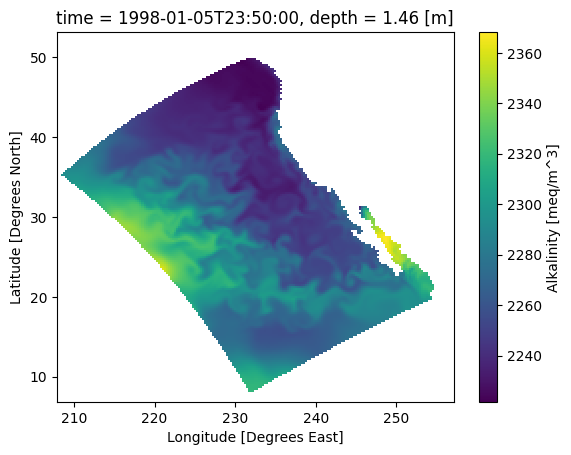

In [7]:
%time ds_regridded["ALK"].isel(depth=0, time=0).plot()

You can also save the regridded dataset `ds_regridded` using xarray's `.to_netcdf()` method. This may take some time, as the regridding computation is triggered only during the saving process because we are using `dask`.

In [8]:
%time ds_regridded.to_netcdf("/pscratch/sd/n/nloose/output/regridded_output.nc")

CPU times: user 25.7 s, sys: 12.9 s, total: 38.5 s
Wall time: 28.3 s


## Specifying the horizontal target resolution

The `.regrid()` method has an optional parameter `horizontal_resolution`, which is the horizontal target resolution in degrees. If this parameter is not provided, `ROMS-Tools` automatically computes an approximate nominal resolution. 

In the example above, `ROMS-Tools` selected a horizontal resolution of 0.25°, as confirmed below.

In [9]:
ds_regridded.lon

<xarray.DataArray 'lon' (lon: 197)> Size: 2kB
array([208.  , 208.25, 208.5 , 208.75, 209.  , 209.25, 209.5 , 209.75, 210.  ,
       210.25, 210.5 , 210.75, 211.  , 211.25, 211.5 , 211.75, 212.  , 212.25,
       212.5 , 212.75, 213.  , 213.25, 213.5 , 213.75, 214.  , 214.25, 214.5 ,
       214.75, 215.  , 215.25, 215.5 , 215.75, 216.  , 216.25, 216.5 , 216.75,
       217.  , 217.25, 217.5 , 217.75, 218.  , 218.25, 218.5 , 218.75, 219.  ,
       219.25, 219.5 , 219.75, 220.  , 220.25, 220.5 , 220.75, 221.  , 221.25,
       221.5 , 221.75, 222.  , 222.25, 222.5 , 222.75, 223.  , 223.25, 223.5 ,
       223.75, 224.  , 224.25, 224.5 , 224.75, 225.  , 225.25, 225.5 , 225.75,
       226.  , 226.25, 226.5 , 226.75, 227.  , 227.25, 227.5 , 227.75, 228.  ,
       228.25, 228.5 , 228.75, 229.  , 229.25, 229.5 , 229.75, 230.  , 230.25,
       230.5 , 230.75, 231.  , 231.25, 231.5 , 231.75, 232.  , 232.25, 232.5 ,
       232.75, 233.  , 233.25, 233.5 , 233.75, 234.  , 234.25, 234.5 , 234.75,
       235.  , 235.25, 235.5 , 235.75, 236.  , 236.25, 236.5 , 236.75, 237.  ,
       237.25, 237.5 , 237.75, 238.  , 238.25, 238.5 , 238.75, 239.  , 239.25,
       239.5 , 239.75, 240.  , 240.25, 240.5 , 240.75, 241.  , 241.25, 241.5 ,
       241.75, 242.  , 242.25, 242.5 , 242.75, 243.  , 243.25, 243.5 , 243.75,
       244.  , 244.25, 244.5 , 244.75, 245.  , 245.25, 245.5 , 245.75, 246.  ,
       246.25, 246.5 , 246.75, 247.  , 247.25, 247.5 , 247.75, 248.  , 248.25,
       248.5 , 248.75, 249.  , 249.25, 249.5 , 249.75, 250.  , 250.25, 250.5 ,
       250.75, 251.  , 251.25, 251.5 , 251.75, 252.  , 252.25, 252.5 , 252.75,
       253.  , 253.25, 253.5 , 253.75, 254.  , 254.25, 254.5 , 254.75, 255.  ,
       255.25, 255.5 , 255.75, 256.  , 256.25, 256.5 , 256.75, 257.  ])
Coordinates:
  * lon      (lon) float64 2kB 208.0 208.2 208.5 208.8 ... 256.5 256.8 257.0
Attributes:
    long_name:  Longitude
    units:      Degrees East

In [10]:
ds_regridded.lat

<xarray.DataArray 'lat' (lat: 185)> Size: 1kB
array([ 7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,  9.  ,  9.25,
        9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  , 11.25, 11.5 , 11.75,
       12.  , 12.25, 12.5 , 12.75, 13.  , 13.25, 13.5 , 13.75, 14.  , 14.25,
       14.5 , 14.75, 15.  , 15.25, 15.5 , 15.75, 16.  , 16.25, 16.5 , 16.75,
       17.  , 17.25, 17.5 , 17.75, 18.  , 18.25, 18.5 , 18.75, 19.  , 19.25,
       19.5 , 19.75, 20.  , 20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 , 21.75,
       22.  , 22.25, 22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75, 24.  , 24.25,
       24.5 , 24.75, 25.  , 25.25, 25.5 , 25.75, 26.  , 26.25, 26.5 , 26.75,
       27.  , 27.25, 27.5 , 27.75, 28.  , 28.25, 28.5 , 28.75, 29.  , 29.25,
       29.5 , 29.75, 30.  , 30.25, 30.5 , 30.75, 31.  , 31.25, 31.5 , 31.75,
       32.  , 32.25, 32.5 , 32.75, 33.  , 33.25, 33.5 , 33.75, 34.  , 34.25,
       34.5 , 34.75, 35.  , 35.25, 35.5 , 35.75, 36.  , 36.25, 36.5 , 36.75,
       37.  , 37.25, 37.5 , 37.75, 38.  , 38.25, 38.5 , 38.75, 39.  , 39.25,
       39.5 , 39.75, 40.  , 40.25, 40.5 , 40.75, 41.  , 41.25, 41.5 , 41.75,
       42.  , 42.25, 42.5 , 42.75, 43.  , 43.25, 43.5 , 43.75, 44.  , 44.25,
       44.5 , 44.75, 45.  , 45.25, 45.5 , 45.75, 46.  , 46.25, 46.5 , 46.75,
       47.  , 47.25, 47.5 , 47.75, 48.  , 48.25, 48.5 , 48.75, 49.  , 49.25,
       49.5 , 49.75, 50.  , 50.25, 50.5 , 50.75, 51.  , 51.25, 51.5 , 51.75,
       52.  , 52.25, 52.5 , 52.75, 53.  ])
Coordinates:
  * lat      (lat) float64 1kB 7.0 7.25 7.5 7.75 8.0 ... 52.25 52.5 52.75 53.0
Attributes:
    long_name:  Latitude
    units:      Degrees North

Next, we specify our own target resolution of 0.5°.

In [11]:
ds_regridded_with_coarser_horizontal_resolution = roms_output.regrid(
    horizontal_resolution=0.5
)

In [12]:
ds_regridded_with_coarser_horizontal_resolution

<xarray.Dataset> Size: 1GB
Dimensions:                (time: 4, lat: 93, lon: 99, depth: 100)
Coordinates:
  * time                   (time) datetime64[ns] 32B 1998-01-05T23:50:00 ... ...
  * lat                    (lat) float64 744B 7.0 7.5 8.0 8.5 ... 52.0 52.5 53.0
  * lon                    (lon) float64 792B 208.0 208.5 209.0 ... 256.5 257.0
  * depth                  (depth) float64 800B 1.46 4.45 ... 5.528e+03
Data variables: (12/53)
    zeta                   (time, lat, lon) float64 295kB dask.array<chunksize=(1, 93, 99), meta=np.ndarray>
    MARBL_PH_3D            (time, lat, lon, depth) float64 29MB dask.array<chunksize=(1, 93, 99, 100), meta=np.ndarray>
    MARBL_PH_3D_ALT_CO2    (time, lat, lon, depth) float64 29MB dask.array<chunksize=(1, 93, 99, 100), meta=np.ndarray>
    MARBL_PH_SURF          (time, lat, lon) float64 295kB dask.array<chunksize=(1, 93, 99), meta=np.ndarray>
    MARBL_ABIO_PH_SURF     (time, lat, lon) float64 295kB dask.array<chunksize=(1, 93, 99), meta=np.ndarray>
    MARBL_PH_SURF_ALT_CO2  (time, lat, lon) float64 295kB dask.array<chunksize=(1, 93, 99), meta=np.ndarray>
    ...                     ...
    u_slow                 (time, lat, lon, depth) float64 29MB dask.array<chunksize=(1, 93, 99, 100), meta=np.ndarray>
    vbar                   (time, lat, lon) float64 295kB dask.array<chunksize=(1, 93, 99), meta=np.ndarray>
    v                      (time, lat, lon, depth) float64 29MB dask.array<chunksize=(1, 93, 99, 100), meta=np.ndarray>
    DV_avg2                (time, lat, lon) float64 295kB dask.array<chunksize=(1, 93, 99), meta=np.ndarray>
    DV_avg_bak             (time, lat, lon) float64 295kB dask.array<chunksize=(1, 93, 99), meta=np.ndarray>
    v_slow                 (time, lat, lon, depth) float64 29MB dask.array<chunksize=(1, 93, 99, 100), meta=np.ndarray>
Attributes: (12/36)
    title:                 eastpac25km , 25km resolution
    grid_file:             /pscratch/sd/e/eay/EASTPAC25KM/INPUT_FIXED_TOPO/ep...
    init_file:             /pscratch/sd/e/eay/EASTPAC25KM_spinup/output/eastp...
    ntimes:                4610
    ndtfast:               45
    dt:                    600.0
    ...                    ...
    CPPS:                  <cppdefs.opt> PACIFIC_PD SOLVE3D UV_ADV UV_COR ADV...
    surf_forcing_strings:  
    bc_options:             OBC_WEST, OBC_NORTH, OBC_SOUTH, OBC_M3ORLANSKI, O...
    git_version:           
    type:                  ROMS restart file
    regrid_method:         bilinear

The horizontal resolution of the new dataset is now 0.5° as desired.

In [13]:
ds_regridded_with_coarser_horizontal_resolution.lon

<xarray.DataArray 'lon' (lon: 99)> Size: 792B
array([208. , 208.5, 209. , 209.5, 210. , 210.5, 211. , 211.5, 212. , 212.5,
       213. , 213.5, 214. , 214.5, 215. , 215.5, 216. , 216.5, 217. , 217.5,
       218. , 218.5, 219. , 219.5, 220. , 220.5, 221. , 221.5, 222. , 222.5,
       223. , 223.5, 224. , 224.5, 225. , 225.5, 226. , 226.5, 227. , 227.5,
       228. , 228.5, 229. , 229.5, 230. , 230.5, 231. , 231.5, 232. , 232.5,
       233. , 233.5, 234. , 234.5, 235. , 235.5, 236. , 236.5, 237. , 237.5,
       238. , 238.5, 239. , 239.5, 240. , 240.5, 241. , 241.5, 242. , 242.5,
       243. , 243.5, 244. , 244.5, 245. , 245.5, 246. , 246.5, 247. , 247.5,
       248. , 248.5, 249. , 249.5, 250. , 250.5, 251. , 251.5, 252. , 252.5,
       253. , 253.5, 254. , 254.5, 255. , 255.5, 256. , 256.5, 257. ])
Coordinates:
  * lon      (lon) float64 792B 208.0 208.5 209.0 209.5 ... 256.0 256.5 257.0
Attributes:
    long_name:  Longitude
    units:      Degrees East

In [14]:
ds_regridded_with_coarser_horizontal_resolution.lat

<xarray.DataArray 'lat' (lat: 93)> Size: 744B
array([ 7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. , 12.5,
       13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. , 17.5, 18. , 18.5,
       19. , 19.5, 20. , 20.5, 21. , 21.5, 22. , 22.5, 23. , 23.5, 24. , 24.5,
       25. , 25.5, 26. , 26.5, 27. , 27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5,
       31. , 31.5, 32. , 32.5, 33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5,
       37. , 37.5, 38. , 38.5, 39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5,
       43. , 43.5, 44. , 44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5,
       49. , 49.5, 50. , 50.5, 51. , 51.5, 52. , 52.5, 53. ])
Coordinates:
  * lat      (lat) float64 744B 7.0 7.5 8.0 8.5 9.0 ... 51.0 51.5 52.0 52.5 53.0
Attributes:
    long_name:  Latitude
    units:      Degrees North

<div class="alert alert-info">

Note

Specifying a horizontal resolution much higher than the nominal resolution can lead to aliasing errors. It is generally advisable to stick with the default horizontal resolution by setting `horizontal_resolution = None`.
    
</div>

## Specifying the target depth levels

Similar to specifying the horizontal target resolution, you can also define the target depth levels using the optional `depth_levels` parameter. If this parameter is not provided, `ROMS-Tools` automatically computes the target vertical depth levels using an exponential profile, resulting in higher resolution near the surface and lower resolution at the bottom. The number of depth levels is automatically set to match the value of `roms_output.ds.s_rho`, which corresponds to the number of vertical layers in the native ROMS grid.

Here are the automatically chosen depth levels from the previous example.

In [15]:
ds_regridded.depth

<xarray.DataArray 'depth' (depth: 100)> Size: 800B
array([1.46000e+00, 4.45000e+00, 7.58000e+00, 1.08500e+01, 1.42700e+01,
       1.78500e+01, 2.16000e+01, 2.55200e+01, 2.96100e+01, 3.39000e+01,
       3.83800e+01, 4.30700e+01, 4.79800e+01, 5.31100e+01, 5.84800e+01,
       6.40900e+01, 6.99700e+01, 7.61100e+01, 8.25400e+01, 8.92600e+01,
       9.62900e+01, 1.03650e+02, 1.11340e+02, 1.19390e+02, 1.27810e+02,
       1.36610e+02, 1.45820e+02, 1.55460e+02, 1.65540e+02, 1.76080e+02,
       1.87110e+02, 1.98640e+02, 2.10710e+02, 2.23330e+02, 2.36530e+02,
       2.50340e+02, 2.64790e+02, 2.79900e+02, 2.95700e+02, 3.12240e+02,
       3.29530e+02, 3.47620e+02, 3.66550e+02, 3.86340e+02, 4.07050e+02,
       4.28710e+02, 4.51360e+02, 4.75060e+02, 4.99850e+02, 5.25780e+02,
       5.52900e+02, 5.81280e+02, 6.10950e+02, 6.42000e+02, 6.74470e+02,
       7.08440e+02, 7.43970e+02, 7.81140e+02, 8.20010e+02, 8.60680e+02,
       9.03220e+02, 9.47710e+02, 9.94260e+02, 1.04294e+03, 1.09387e+03,
       1.14714e+03, 1.20287e+03, 1.26116e+03, 1.32213e+03, 1.38591e+03,
       1.45262e+03, 1.52240e+03, 1.59540e+03, 1.67176e+03, 1.75163e+03,
       1.83517e+03, 1.92256e+03, 2.01398e+03, 2.10960e+03, 2.20962e+03,
       2.31425e+03, 2.42370e+03, 2.53818e+03, 2.65793e+03, 2.78319e+03,
       2.91422e+03, 3.05127e+03, 3.19464e+03, 3.34461e+03, 3.50147e+03,
       3.66556e+03, 3.83720e+03, 4.01674e+03, 4.20455e+03, 4.40100e+03,
       4.60649e+03, 4.82144e+03, 5.04629e+03, 5.28148e+03, 5.52750e+03])
Coordinates:
  * depth    (depth) float64 800B 1.46 4.45 7.58 ... 5.281e+03 5.528e+03
Attributes:
    long_name:  Depth
    units:      m

Next, we specify our own target depth levels, which can be done using an `xarray.DataArray`, `numpy.ndarray`, or `list`.

Let's specify target depth levels with 1m resolution for the upper 500m, and 500m resolution below that.

In [16]:
import numpy as np

In [17]:
target_depth_levels = np.concatenate((np.arange(0, 500), np.arange(500, 5000, 500)))

These are 509 depth levels in total!

In [18]:
len(target_depth_levels)

509

In [19]:
ds_regridded_with_custom_vertical_depth_levels = roms_output.regrid(
    depth_levels=target_depth_levels
)

In [20]:
ds_regridded_with_custom_vertical_depth_levels

<xarray.Dataset> Size: 24GB
Dimensions:                (time: 4, lat: 185, lon: 197, depth: 509)
Coordinates:
  * time                   (time) datetime64[ns] 32B 1998-01-05T23:50:00 ... ...
  * lat                    (lat) float64 1kB 7.0 7.25 7.5 ... 52.5 52.75 53.0
  * lon                    (lon) float64 2kB 208.0 208.2 208.5 ... 256.8 257.0
  * depth                  (depth) int64 4kB 0 1 2 3 4 ... 3000 3500 4000 4500
Data variables: (12/53)
    zeta                   (time, lat, lon) float64 1MB dask.array<chunksize=(1, 185, 197), meta=np.ndarray>
    MARBL_PH_3D            (time, lat, lon, depth) float64 594MB dask.array<chunksize=(1, 185, 197, 509), meta=np.ndarray>
    MARBL_PH_3D_ALT_CO2    (time, lat, lon, depth) float64 594MB dask.array<chunksize=(1, 185, 197, 509), meta=np.ndarray>
    MARBL_PH_SURF          (time, lat, lon) float64 1MB dask.array<chunksize=(1, 185, 197), meta=np.ndarray>
    MARBL_ABIO_PH_SURF     (time, lat, lon) float64 1MB dask.array<chunksize=(1, 185, 197), meta=np.ndarray>
    MARBL_PH_SURF_ALT_CO2  (time, lat, lon) float64 1MB dask.array<chunksize=(1, 185, 197), meta=np.ndarray>
    ...                     ...
    u_slow                 (time, lat, lon, depth) float64 594MB dask.array<chunksize=(1, 185, 197, 509), meta=np.ndarray>
    vbar                   (time, lat, lon) float64 1MB dask.array<chunksize=(1, 185, 197), meta=np.ndarray>
    v                      (time, lat, lon, depth) float64 594MB dask.array<chunksize=(1, 185, 197, 509), meta=np.ndarray>
    DV_avg2                (time, lat, lon) float64 1MB dask.array<chunksize=(1, 185, 197), meta=np.ndarray>
    DV_avg_bak             (time, lat, lon) float64 1MB dask.array<chunksize=(1, 185, 197), meta=np.ndarray>
    v_slow                 (time, lat, lon, depth) float64 594MB dask.array<chunksize=(1, 185, 197, 509), meta=np.ndarray>
Attributes: (12/36)
    title:                 eastpac25km , 25km resolution
    grid_file:             /pscratch/sd/e/eay/EASTPAC25KM/INPUT_FIXED_TOPO/ep...
    init_file:             /pscratch/sd/e/eay/EASTPAC25KM_spinup/output/eastp...
    ntimes:                4610
    ndtfast:               45
    dt:                    600.0
    ...                    ...
    CPPS:                  <cppdefs.opt> PACIFIC_PD SOLVE3D UV_ADV UV_COR ADV...
    surf_forcing_strings:  
    bc_options:             OBC_WEST, OBC_NORTH, OBC_SOUTH, OBC_M3ORLANSKI, O...
    git_version:           
    type:                  ROMS restart file
    regrid_method:         bilinear

You can see that the new dataset contains the 509 depth levels we specified.

## Specifying the variables to be regridded

Finally, we can specify a subset of the original variables to be regridded.

In [26]:
ds_regridded_with_subset_of_variables = roms_output.regrid(
    var_names=["zeta", "temp", "salt", "u", "v", "ALK"]
)

In [27]:
ds_regridded_with_subset_of_variables

<xarray.Dataset> Size: 584MB
Dimensions:  (time: 4, lat: 185, lon: 197, depth: 100)
Coordinates:
  * time     (time) datetime64[ns] 32B 1998-01-05T23:50:00 ... 1999-02-01
  * lat      (lat) float64 1kB 7.0 7.25 7.5 7.75 8.0 ... 52.25 52.5 52.75 53.0
  * lon      (lon) float64 2kB 208.0 208.2 208.5 208.8 ... 256.5 256.8 257.0
  * depth    (depth) float64 800B 1.46 4.45 7.58 ... 5.281e+03 5.528e+03
Data variables:
    zeta     (time, lat, lon) float64 1MB dask.array<chunksize=(1, 185, 197), meta=np.ndarray>
    temp     (time, lat, lon, depth) float64 117MB dask.array<chunksize=(1, 185, 197, 100), meta=np.ndarray>
    salt     (time, lat, lon, depth) float64 117MB dask.array<chunksize=(1, 185, 197, 100), meta=np.ndarray>
    ALK      (time, lat, lon, depth) float64 117MB dask.array<chunksize=(1, 185, 197, 100), meta=np.ndarray>
    u        (time, lat, lon, depth) float64 117MB dask.array<chunksize=(1, 185, 197, 100), meta=np.ndarray>
    v        (time, lat, lon, depth) float64 117MB dask.array<chunksize=(1, 185, 197, 100), meta=np.ndarray>
Attributes: (12/36)
    title:                 eastpac25km , 25km resolution
    grid_file:             /pscratch/sd/e/eay/EASTPAC25KM/INPUT_FIXED_TOPO/ep...
    init_file:             /pscratch/sd/e/eay/EASTPAC25KM_spinup/output/eastp...
    ntimes:                4610
    ndtfast:               45
    dt:                    600.0
    ...                    ...
    CPPS:                  <cppdefs.opt> PACIFIC_PD SOLVE3D UV_ADV UV_COR ADV...
    surf_forcing_strings:  
    bc_options:             OBC_WEST, OBC_NORTH, OBC_SOUTH, OBC_M3ORLANSKI, O...
    git_version:           
    type:                  ROMS restart file
    regrid_method:         bilinear